In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, accuracy_score, label_ranking_average_precision_score

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
!pip install import-ipynb
import import_ipynb
%cd '/content/drive/MyDrive/Colab Notebooks'
import MFCC

/content/drive/MyDrive/Colab Notebooks


knn

In [4]:
def CreateKNNModel(Xtrain, ytrain):
    model_pipeline = Pipeline([('standardize', StandardScaler()),('knn', KNeighborsClassifier())])
    grid_params = {'knn__n_neighbors': [3,5,7,9], 'knn__metric': ['euclidean', 'manhattan'], 'knn__weights': ['uniform', 'distance']}
    gsKNN = GridSearchCV(model_pipeline, grid_params,cv = 3, scoring = 'accuracy', refit = True)
    gsKNN.fit(Xtrain, ytrain)
    print(gsKNN.best_params_)
    print("with score of ",gsKNN.best_score_)
    return gsKNN.best_estimator_

In [5]:
def KNNEvaluate(Xtrain, ytrain, Xtest, ytest):
    model = CreateKNNModel(Xtrain, ytrain)
    auc_avg = roc_auc_score(ytest, model.predict_proba(Xtest), multi_class='ovr')
    ytestC = to_categorical(ytest)
    weights = np.sum(np.array(ytestC),axis=1)
    lwlrap = label_ranking_average_precision_score(ytestC, model.predict_proba(Xtest), sample_weight = weights )
    print("auc for test data: {}".format(round(auc_avg,4)))
    print("lwlrap for test data: {}".format(round(lwlrap,4)))
    print("accuracy for test data: {}".format(round(accuracy_score(ytest,model.predict(Xtest)),4)))
    print("f1 for test data: {}".format(round(f1_score(ytest,model.predict(Xtest),average = 'macro'),4)))
    cf_matrix = confusion_matrix(ytest, model.predict(Xtest))
    fig, ax = plt.subplots(figsize=(24,24))
    sns.heatmap(cf_matrix/cf_matrix.astype(np.float).sum(axis=1), annot=True, fmt='.2%', cmap='Blues', linewidths=.5, ax=ax)
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual')
    plt.show()

In [6]:
X_aug,y_aug = MFCC.generateMFCCs('/content/drive/MyDrive/ML_proj3_aug','/content/train_tp.csv', True, True)
#np.savetxt("Aug_MFCC_mean.txt", X_aug)
#np.savetxt("Aug_MFCC_mean_label.txt", y_aug)
X_aug.shape, len(y_aug)

((4864, 128), 4864)

In [ ]:
### retrieval code
X_aug = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Aug_MFCC_mean.txt")
y_aug = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Aug_MFCC_mean_label.txt")

X_aug.shape, len(y_aug)

((4864, 128), 4864)

In [ ]:
Xtrain_aug, Xtest_aug, ytrain_aug, ytest_aug = MFCC.splitMFCCData(X_aug,y_aug)
Xtrain_aug.shape, len(ytrain_aug), len(ytest_aug)

((3404, 128), 3404, 1460)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
with score of  0.6166235461389645
auc for test data: 0.8866
lwlrap for test data: 0.7639
accuracy for test data: 0.7219
f1 for test data: 0.7392


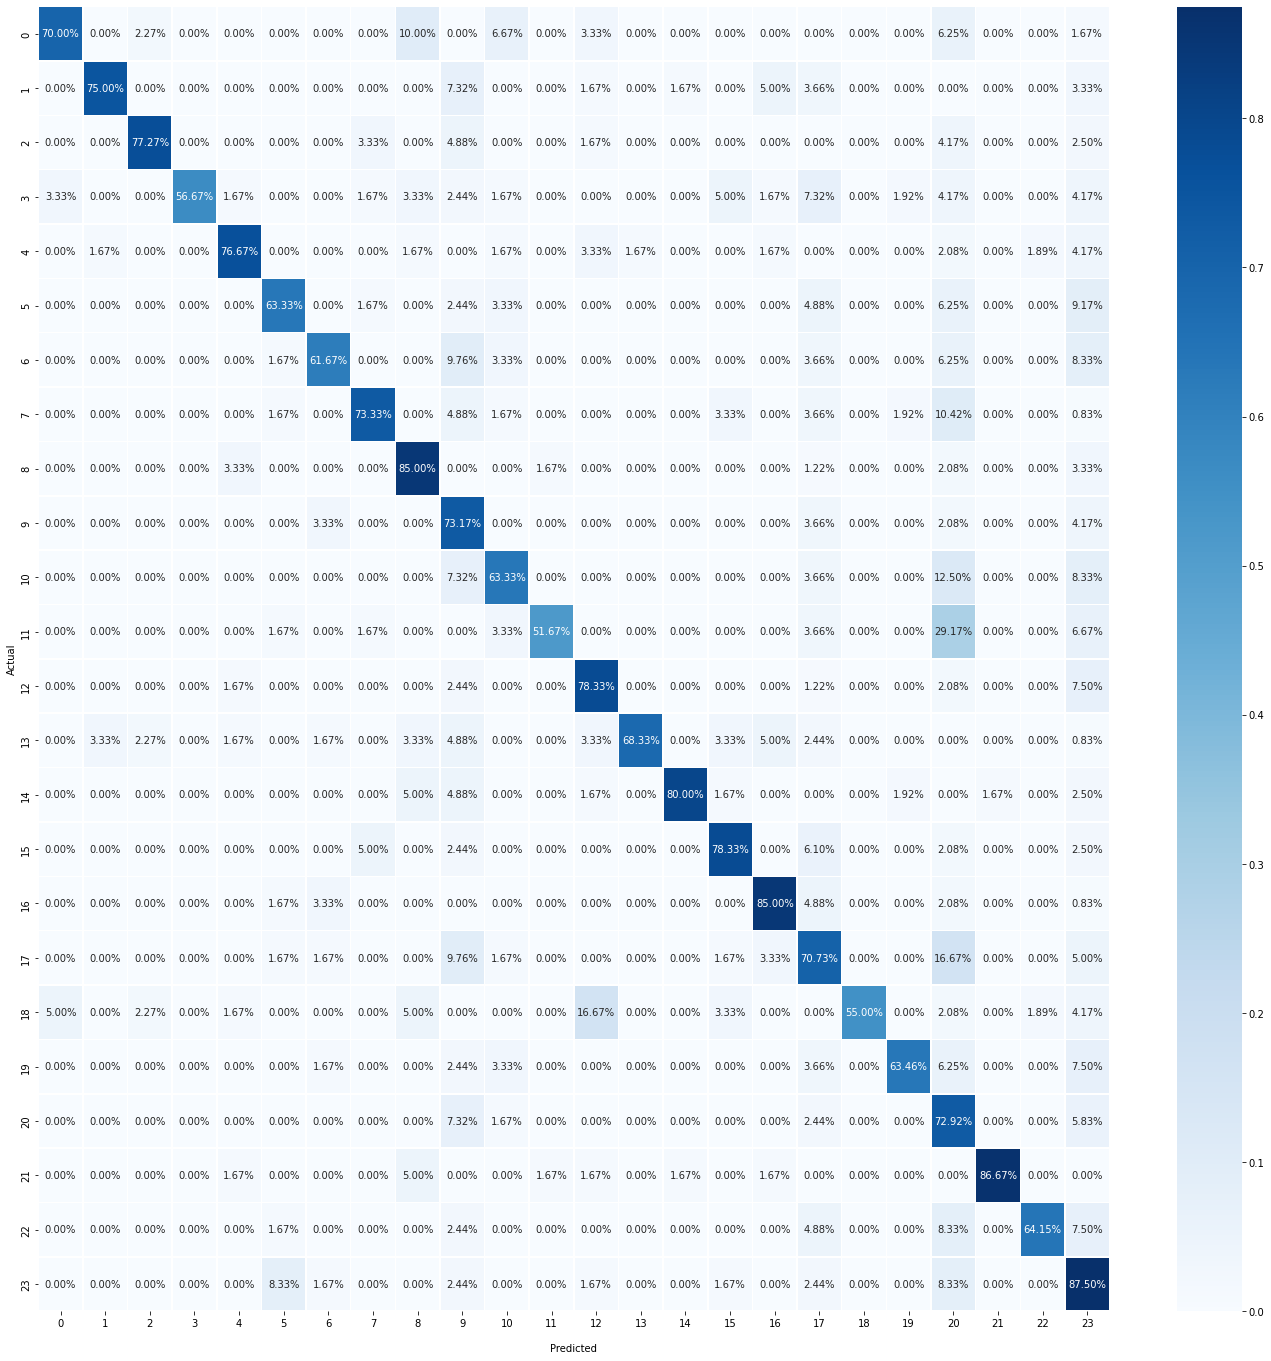

In [ ]:
##grid search over all data
KNNEvaluate(Xtrain_aug, ytrain_aug, Xtest_aug, ytest_aug)